<a href="https://colab.research.google.com/github/RongerYang/Prediction_of_Online_Purchasing_Intention/blob/main/INF2190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF2190 - Project
## Prediction of Online Purchasing Intention
Jielin Jiang, 1008615278 <br>
Toby Liang, 1003551364 <br>
Tiancheng Sheng, 1007429819 <br>
Ronger Yang, 1003010635 <br>

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn import metrics 

In [4]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
print(dataset.shape)
dataset.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# EDA


In [5]:
sns.set_theme(style="darkgrid")

### Distribution of Attributes

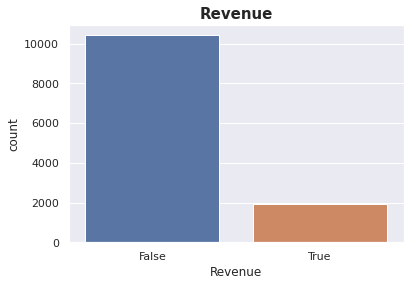

In [6]:
plt.figure()
sns.countplot(data=dataset, x='Revenue')
plt.title('Revenue', fontsize=15, fontweight='bold')
plt.show()

In [7]:
operating_system = {1 : "IOS", 2 : "Android Mobile", 3 : "Windows", 4 : "Linux", 
                    5 : "MS-DOS", 6 : "Fedora", 7 : "Ubuntu", 8: "Solaris"}

browser = {1 : "Firefox", 2 : "Google Chrome", 3 : "Microsoft Edge", 4 : "Apple Safari", 
           5 : "Opera", 6 : "Brave", 7 : "UCBrowser", 8: "DuckDuckgo",
           9 : "Chromium", 10 : "Epic", 11 : "Internet Explorer", 12: "Tor Browser",
           13 : "Maxthon"}

region = {1 : "China", 2 : "Indonesia", 3 : "India", 4 : "United States", 
          5 : "Brazil", 6 : "Nigeria", 7 : "Japan", 8: "Russia",
          9 : "Bangladesh"}

dataset.OperatingSystems = dataset.OperatingSystems.map(operating_system)
dataset.Browser = dataset.Browser.map(browser)
dataset.Region = dataset.Region.map(region)

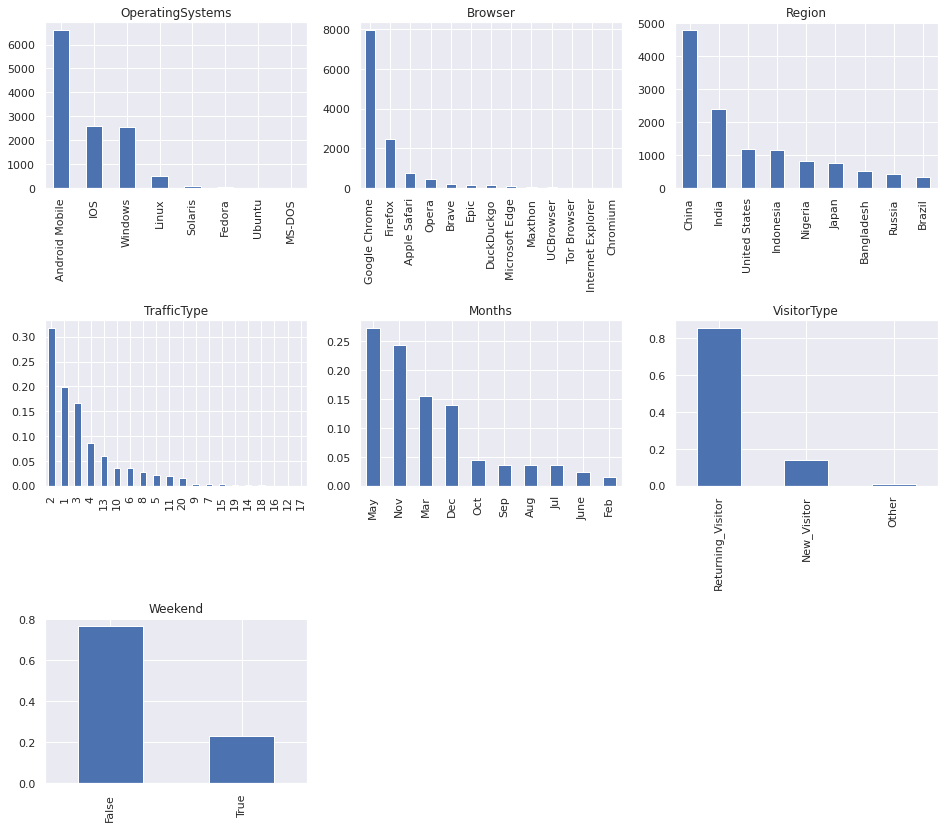

In [8]:
fig = plt.figure(figsize=(16, 14))
fig.subplots_adjust(hspace=0.8)

plt.subplot(331) 
dataset.OperatingSystems.value_counts().plot.bar(title='OperatingSystems')

plt.subplot(332) 
dataset.Browser.value_counts().plot.bar(title='Browser')

plt.subplot(333)
dataset.Region.value_counts().plot.bar(title='Region') 

plt.subplot(334)
dataset['TrafficType'].value_counts(normalize=True).plot.bar(title='TrafficType')

plt.subplot(335) 
dataset['Month'].value_counts(normalize=True).plot.bar(title= 'Months')

plt.subplot(336) 
dataset['VisitorType'].value_counts(normalize=True).plot.bar(title= 'VisitorType')

plt.subplot(337) 
dataset['Weekend'].value_counts(normalize=True).plot.bar(title= 'Weekend')
plt.show()

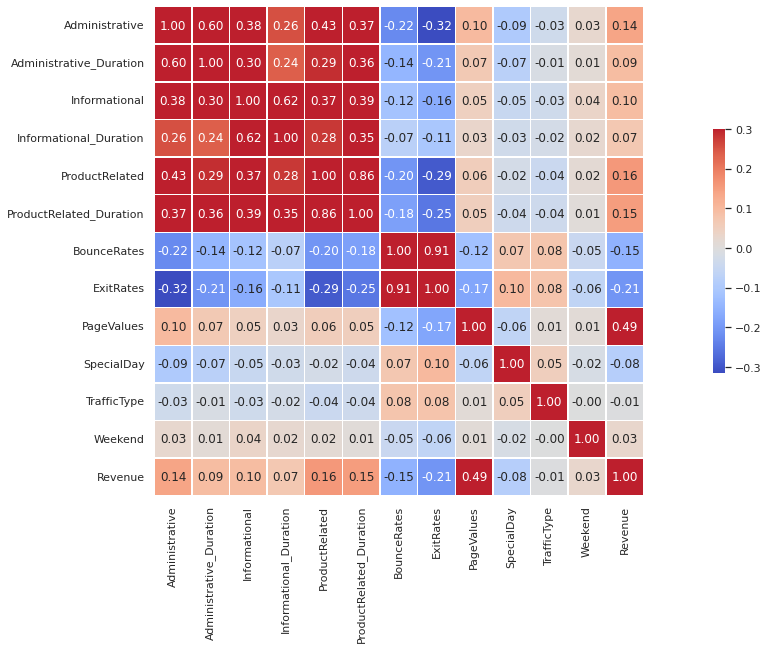

In [9]:
# Correlation Matrix
corr = dataset.corr()
g = sns.heatmap(corr, 
                vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, annot=True, 
                fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(25,9)
plt.show()

### One-hot Encoding

In [10]:
dummy_df = pd.get_dummies(dataset)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Administrative                   12330 non-null  int64  
 1   Administrative_Duration          12330 non-null  float64
 2   Informational                    12330 non-null  int64  
 3   Informational_Duration           12330 non-null  float64
 4   ProductRelated                   12330 non-null  int64  
 5   ProductRelated_Duration          12330 non-null  float64
 6   BounceRates                      12330 non-null  float64
 7   ExitRates                        12330 non-null  float64
 8   PageValues                       12330 non-null  float64
 9   SpecialDay                       12330 non-null  float64
 10  TrafficType                      12330 non-null  int64  
 11  Weekend                          12330 non-null  bool   
 12  Revenue           

# Train-Test Split & Data Balancing

In [11]:
X = dummy_df.drop('Revenue', axis=1)
y = dummy_df.Revenue

from collections import Counter
print(f"Before balancing, y statistics: {Counter(y)}\n")

# balancing data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_res, y_res = smote.fit_resample(X,y)

print('After OverSampling, the shape of X: {}'.format(X_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before balancing, y statistics: Counter({False: 10422, True: 1908})

After OverSampling, the shape of X: (20844, 55)
After OverSampling, the shape of y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


## 1. Logistic Regression

In [13]:
accuracy_lg_kfold = []
precision_lg_kfold = []
f1score_lg_kfold = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
model = LogisticRegression(solver='liblinear')

for train_x, test_x in kfold.split(X_res, y_res):
  train_X, test_X = X_res.iloc[train_x,:], X_res.iloc[test_x,:]
  train_y, test_y = y_res[train_x], y_res[test_x]
  print(f"Training target statistics: {Counter(train_y)}")
  print(f"Testing target statistics: {Counter(test_y)}\n")

  model.fit(train_X, train_y)
  y_pred = model.predict(test_X)
  accuracy_lg_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_lg_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_lg_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_lg_kfoldmean = np.mean(accuracy_lg_kfold) * 100
print("Accuracy for Logistic Regression with K-fold CV: %.3f" % (accuracy_lg_kfoldmean))
precision_lg_kfoldmean = np.mean(precision_lg_kfold) * 100
print("Precision for Logistic Regression with K-fold CV: %.3f" % (precision_lg_kfoldmean))
f1score_lg_kfoldmean = np.mean(f1score_lg_kfold) * 100
print("F1-score for Logistic Regression with K-fold CV: %.3f" % (f1score_lg_kfoldmean))


Training target statistics: Counter({True: 8338, False: 8337})
Testing target statistics: Counter({False: 2085, True: 2084})

Training target statistics: Counter({True: 8338, False: 8337})
Testing target statistics: Counter({False: 2085, True: 2084})

Training target statistics: Counter({False: 8338, True: 8337})
Testing target statistics: Counter({True: 2085, False: 2084})

Training target statistics: Counter({False: 8338, True: 8337})
Testing target statistics: Counter({True: 2085, False: 2084})

Training target statistics: Counter({False: 8338, True: 8338})
Testing target statistics: Counter({False: 2084, True: 2084})

Accuracy for Logistic Regression with K-fold CV: 92.612
Precision for Logistic Regression with K-fold CV: 96.426
F1-score for Logistic Regression with K-fold CV: 92.294


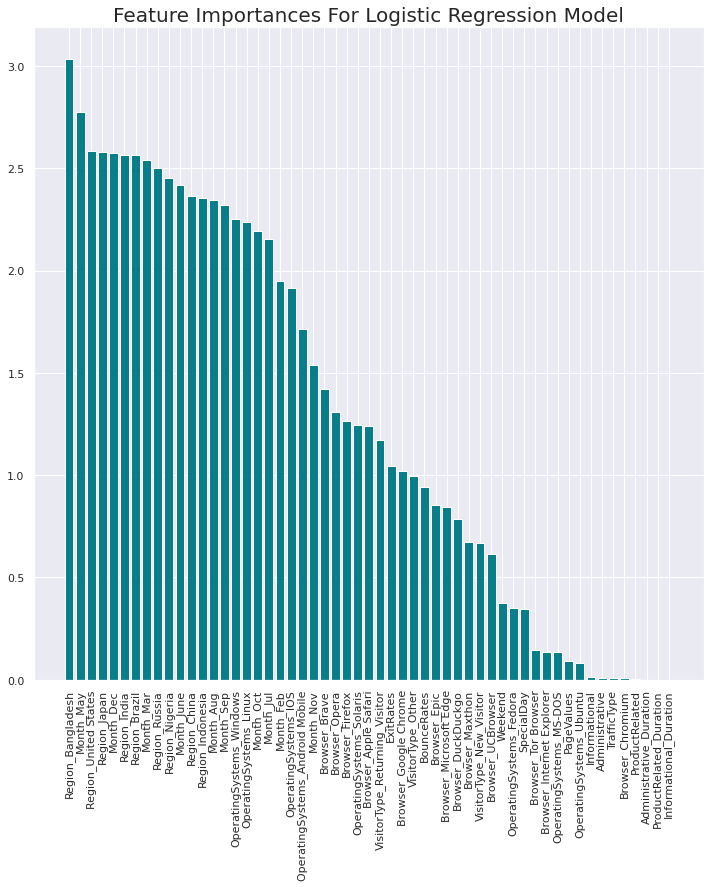

In [17]:
plt.figure(figsize=(12,12))
importances = pd.DataFrame(data={
    'Attribute': X_res.columns,
    'Importance': list(map(abs,model.coef_[0]))
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importances For Logistic Regression Model', size=20)
plt.xticks(rotation='vertical')
plt.show()


## 2. K-NN

Text(0, 0.5, 'ROC_AUC / Error rate')

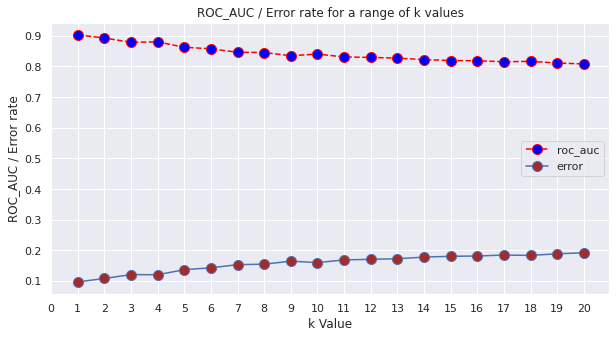

In [21]:
error = []
roc_auc = []

# 80%-20% train-test split on balanced data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size =0.2)

#Calculating error for K values between 1 and 20
for i in range(1, 21):
  
  knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=i)
  knn.fit(X_train_res, y_train_res)
  pred_i = knn.predict(X_test_res)

  roc_auc.append(metrics.roc_auc_score(y_test_res, pred_i))
  error.append(np.mean(pred_i != y_test_res))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), roc_auc, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10, label="roc_auc")
plt.plot(range(1, 21), error, marker='o', markerfacecolor='brown', markersize=10, label="error")
plt.legend()
plt.title('ROC_AUC / Error rate for a range of k values')
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('k Value')
plt.ylabel('ROC_AUC / Error rate')

In [22]:
print("Minimum error:",min(error),"at K =",error.index(min(error)) + 1)
print("Maximum ROC_AUC:",min(roc_auc),"at K =",roc_auc.index(max(roc_auc))+1)

Minimum error: 0.09618613576397217 at K = 1
Maximum ROC_AUC: 0.8078216563090372 at K = 1


In [23]:
accuracy_knn_kfold = []
precision_knn_kfold = []
f1score_knn_kfold = []

min_neighbours = error.index(min(error), 0, len(error)) + 1

for train_x, test_x in kfold.split(X_res, y_res):
  train_X, test_X = X_res.iloc[train_x,:], X_res.iloc[test_x,:]
  train_y, test_y = y_res[train_x], y_res[test_x]
  print(f"Training target statistics: {Counter(train_y)}")
  print(f"Testing target statistics: {Counter(test_y)}\n")

  knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=min_neighbours)
  knn.fit(train_X, train_y)
  y_pred = knn.predict(test_X)
  accuracy_knn_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_knn_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_knn_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_knn_kfoldmean = np.mean(accuracy_knn_kfold) * 100
print("Accuracy for K-NN with K-fold CV: %.3f" % (accuracy_knn_kfoldmean))
precision_knn_kfoldmean = np.mean(precision_knn_kfold) * 100
print("Precision for K-NN with K-fold CV: %.3f" % (precision_knn_kfoldmean))
f1score_knn_kfoldmean = np.mean(f1score_knn_kfold) * 100
print("F1-score for K-NN with K-fold CV: %.3f" % (f1score_knn_kfoldmean))

Training target statistics: Counter({True: 8338, False: 8337})
Testing target statistics: Counter({False: 2085, True: 2084})

Training target statistics: Counter({True: 8338, False: 8337})
Testing target statistics: Counter({False: 2085, True: 2084})

Training target statistics: Counter({False: 8338, True: 8337})
Testing target statistics: Counter({True: 2085, False: 2084})

Training target statistics: Counter({False: 8338, True: 8337})
Testing target statistics: Counter({True: 2085, False: 2084})

Training target statistics: Counter({False: 8338, True: 8338})
Testing target statistics: Counter({False: 2084, True: 2084})

Accuracy for K-NN with K-fold CV: 89.656
Precision for K-NN with K-fold CV: 85.510
F1-score for K-NN with K-fold CV: 90.228


## 3. SVC

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_svc = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001]
}

svc = SVC()
skf_svc = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_svc, 
                              cv = skf_svc.split(X_train_res, y_train_res), 
                              n_jobs = -1, verbose = 2)
grid_search_svc.fit(X_train_res, y_train_res)
print(grid_search_svc.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
svc = SVC(kernel= , C=, gamma=)
svc.fit(X_train_res, y_train_res)
y_pred_svc_kfold = rf.predict(X_test_res)

accuracy_svc_kfold = 100 * metrics.accuracy_score(y_test_res, y_pred_svc_kfold)
print("Accuracy for SVM with k-fold: %.3f" % (accuracy_svc_kfold))
precision_svc_kfold = 100 * metrics.precision_score(y_test_res, y_pred_svc_kfold)
print("Precision for SVM with k-fold: %.3f" % (precision_svc_kfold))
f1score_svc_kfold = 100 * metrics.f1_score(y_test_res, y_pred_svc_kfold)
print("F1-score for SVM with k-fold: %.3f" % (f1score_svc_kfold))

In [ ]:
kernels = ['rbf', 'poly']

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
accuracy_svc_kfoldmean = []f
precision_svc_kfoldmean = []
f1score_svc_kfoldmean = []

for k in kernels:
  accuracy_svc_kfold = []
  precision_svc_kfold = []
  f1score_svc_kfold = []

  for train_x, test_x in kfold.split(X_res, y_res):
    train_X, test_X = X_res.iloc[train_x,:], X_res.iloc[test_x,:]
    train_y, test_y = y_res[train_x], y_res[test_x]
    print(f"Training target statistics: {Counter(train_y)}")
    print(f"Testing target statistics: {Counter(test_y)}\n")

    svc = SVC(kernel=k)
    svc.fit(train_X, train_y)
    y_pred = svc.predict(test_X)

    accuracy_svc_kfold.append(metrics.accuracy_score(test_y, y_pred))
    precision_svc_kfold.append(metrics.precision_score(test_y, y_pred))
    f1score_svc_kfold.append(metrics.f1_score(test_y, y_pred))
    print(accuracy_svc_kfold)
    break
  break

  accuracy = np.mean(accuracy_svc_kfold) * 100
  accuracy_svc_kfoldmean.append(accuracy)
  print("Accuracy for SVC with kernel={}: %.3f".format(kernel) % (accuracy))
  precision = np.mean(precision_svc_kfold) * 100
  precision_svc_kfoldmean.append(precision)
  print("Precision for SVC with kernel={}: %.3f".format(kernel) % (precision))
  f1 = np.mean(f1score_svc_kfold) * 100
  f1score_svc_kfoldmean.append(f1)
  print("F1-score for SVC with kernel={}: %.3f".format(kernel) % (f1))

print("Accuracy:", accuracy_svc_kfoldmean)
print("Precision:", precision_svc_kfoldmean)
print("F1 Score:", f1score_svc_kfoldmean)

Training target statistics: Counter({True: 8338, False: 8337})
Testing target statistics: Counter({False: 2085, True: 2084})

[0.7243943391700648]
Accuracy: []
Precision: []
F1 Score: []


In [ ]:
plt.figure(figsize=(12,12))
importances = pd.DataFrame(data={
    'Attribute': X_res.columns,
    'Importance': svc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importances For SVC Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

## 4. Decision Tree

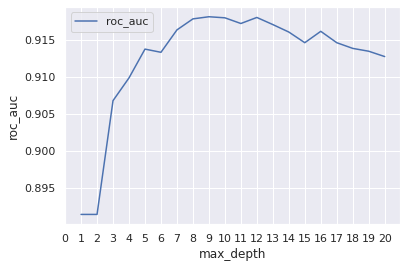

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

max_depth = []
roc_auc = []
for i in range(1,21,1):
  ra = []
  for train_x, test_x in kfold.split(X_res, y_res):
    train_X, test_X = X_res.iloc[train_x,:], X_res.iloc[test_x,:]
    train_y, test_y = y_res[train_x], y_res[test_x]

    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(train_X, train_y)
    pred = dtree.predict(test_X)
    ra.append(metrics.roc_auc_score(test_y, pred))

  roc_auc.append(np.mean(ra))
  max_depth.append(i)

d = pd.DataFrame({'roc_auc':pd.Series(roc_auc), 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','roc_auc', data=d)
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('max_depth')
plt.ylabel('roc_auc')
plt.legend()

In [35]:
depth = max_depth[roc_auc.index(max(roc_auc))]
print("max_depth:", depth)
print()

# 80%-20% train-test split on balanced data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size =0.2)

print(f"Training target statistics: {Counter(y_train_res)}")
print(f"Testing target statistics: {Counter(y_test_res)}\n")


dtc = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dtc.fit(X_train_res, y_train_res)
y_pred = dtc.predict(X_test_res)

accuracy_dtc = 100 * metrics.accuracy_score(y_test_res, y_pred)
print("Accuracy for Decision Tree: %.3f" % (accuracy_dtc))
precision_dtc = 100 * metrics.precision_score(y_test_res, y_pred)
print("Precision for Decision Tree: %.3f" % (precision_dtc))
f1score_dtc = 100 * metrics.f1_score(y_test_res, y_pred)
print("F1-score for Decision Tree: %.3f" % (f1score_dtc))


max_depth: 9

Training target statistics: Counter({False: 8365, True: 8310})
Testing target statistics: Counter({True: 2112, False: 2057})

Accuracy for Decision Tree: 91.365
Precision for Decision Tree: 90.706
F1-score for Decision Tree: 91.557


Text(0.5, 257.44, 'Predicted label')

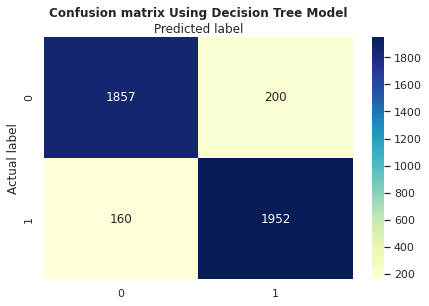

In [36]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using Decision Tree Model', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

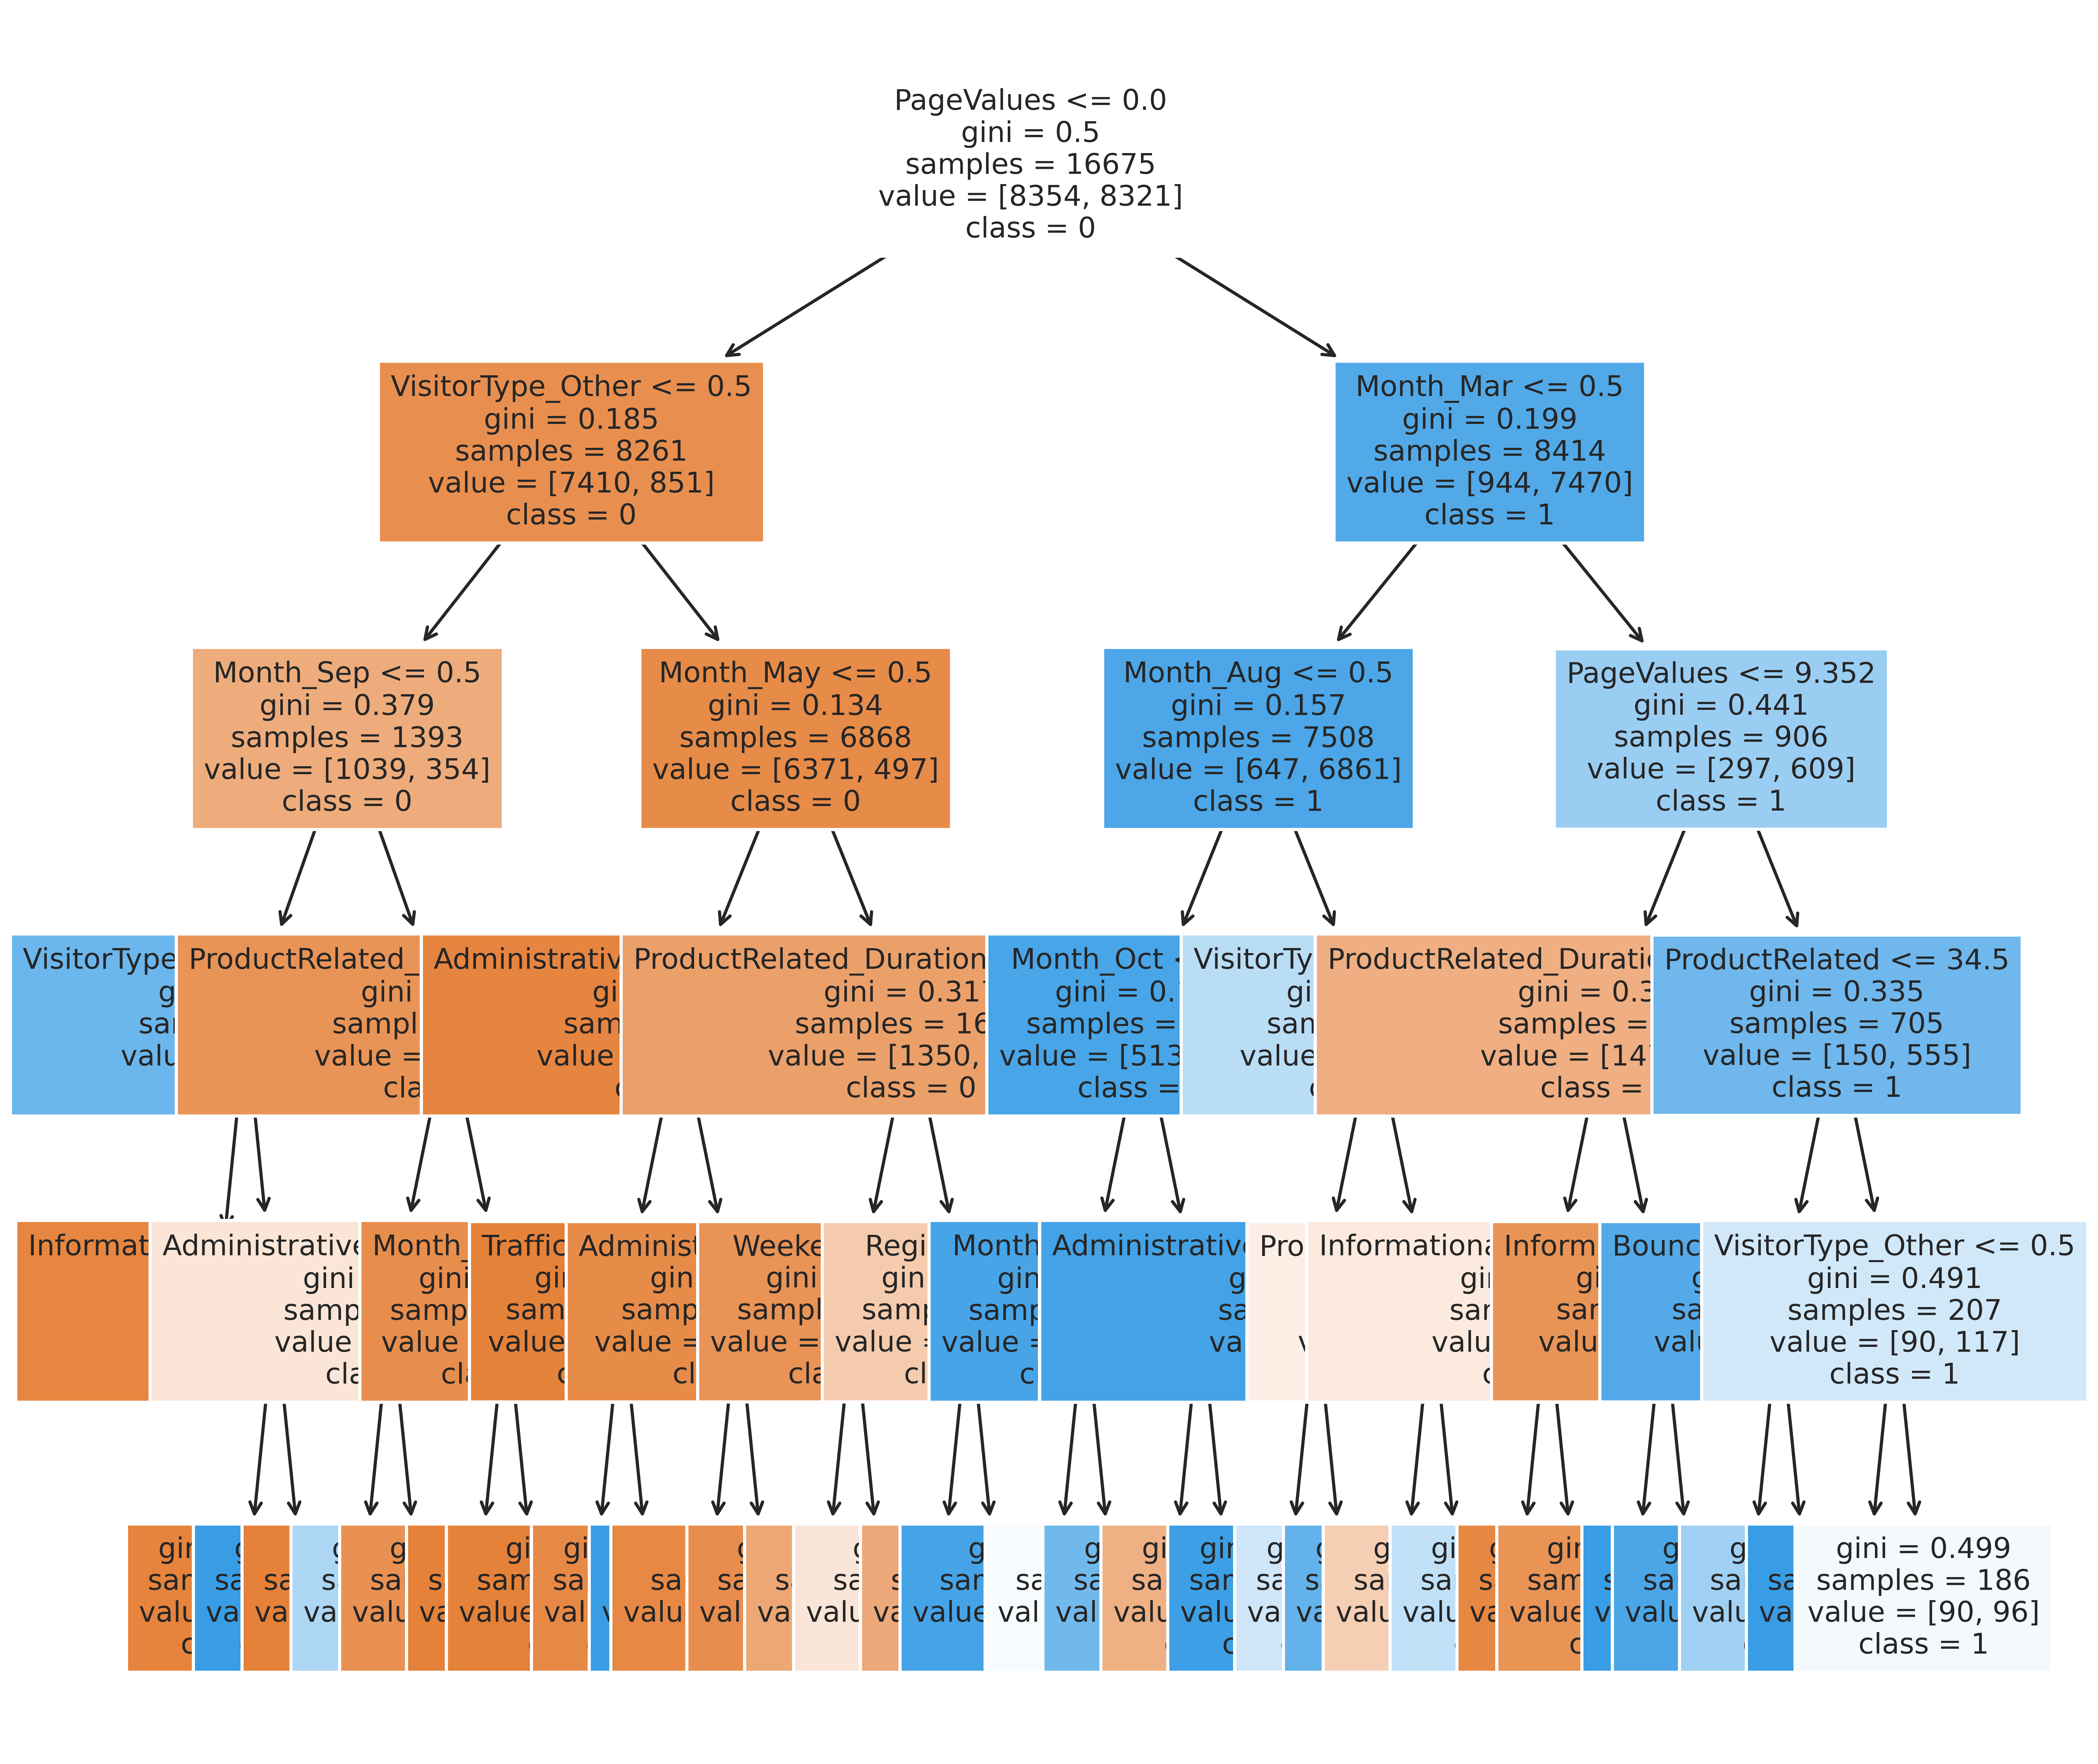

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 1,dpi=800, figsize=(10, 10))
tree.plot_tree(dtc, 
               feature_names=dummy_df.columns[:-1], 
               class_names=['0', '1'], 
               filled=True,
               fontsize=9)
plt.show()

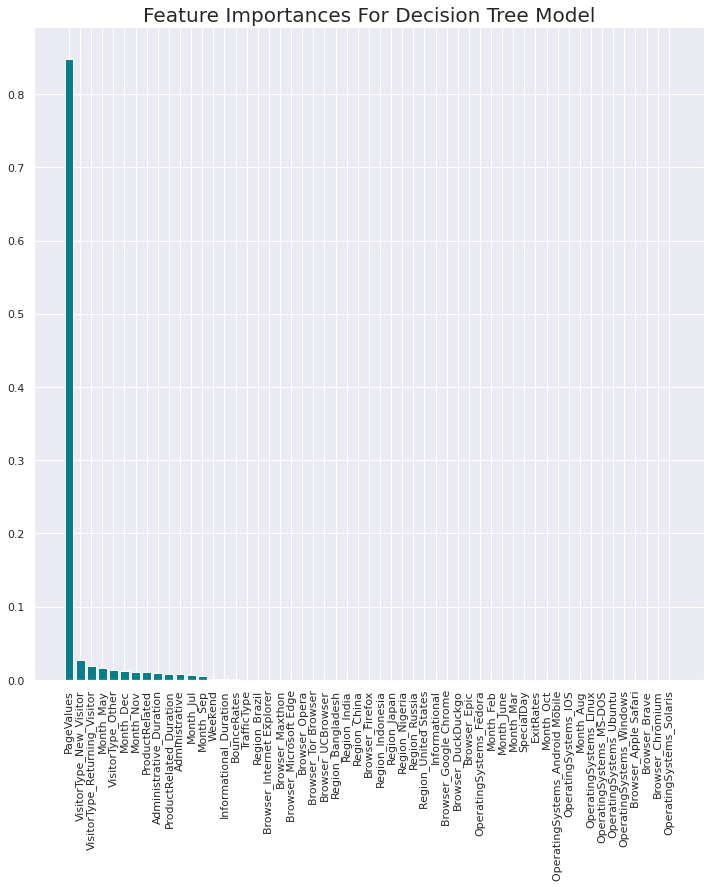

In [40]:
plt.figure(figsize=(12,12))
importances = pd.DataFrame(data={
    'Attribute': X_res.columns,
    'Importance': dtc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importances For Decision Tree Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

## 5. Random Forest with K-fold CV
### 5.1 Tuning Hyper-parameters

In [ ]:
param_rf = {
    'bootstrap': [True],
    'max_depth': [20, 40, 80],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 50, 100, 150]
}

rf = RandomForestClassifier()
skf_rf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 0)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_rf, 
                              cv = skf_rf.split(X_train_res, y_train_res), 
                              n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train_res, y_train_res)

print(grid_search_rf.best_params_)

### 5.2 Fitting RF Model with Tuned Hyper-parameters

In [37]:
#y_pred_rf_kfold = grid_search_rf.best_estimator_.predict(X_test_res)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2,min_samples_leaf=1,max_features=2,max_depth=40,bootstrap=True)
rf.fit(X_train_res, y_train_res)
y_pred_rf_kfold = rf.predict(X_test_res)

accuracy_rf_kfold = 100 * metrics.accuracy_score(y_test_res, y_pred_rf_kfold)
print("Accuracy for Random Forest: %.3f" % (accuracy_rf_kfold))
precision_rf_kfold = 100 * metrics.precision_score(y_test_res, y_pred_rf_kfold)
print("Precision for Random Forest: %.3f" % (precision_rf_kfold))
f1score_rf_kfold = 100 * metrics.f1_score(y_test_res, y_pred_rf_kfold)
print("F1-score for Random Forest: %.3f" % (f1score_rf_kfold))


Accuracy for Random Forest: 94.219
Precision for Random Forest: 95.880
F1-score for Random Forest: 94.194


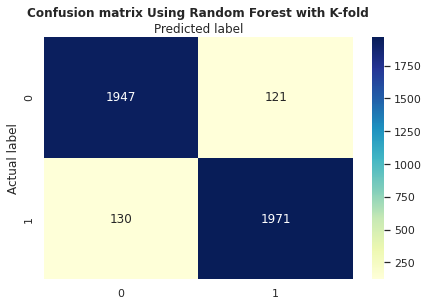

In [ ]:
cnf_matrix_rf = metrics.confusion_matrix(y_test_res, y_pred_rf_kfold)
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using Random Forest with K-fold', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

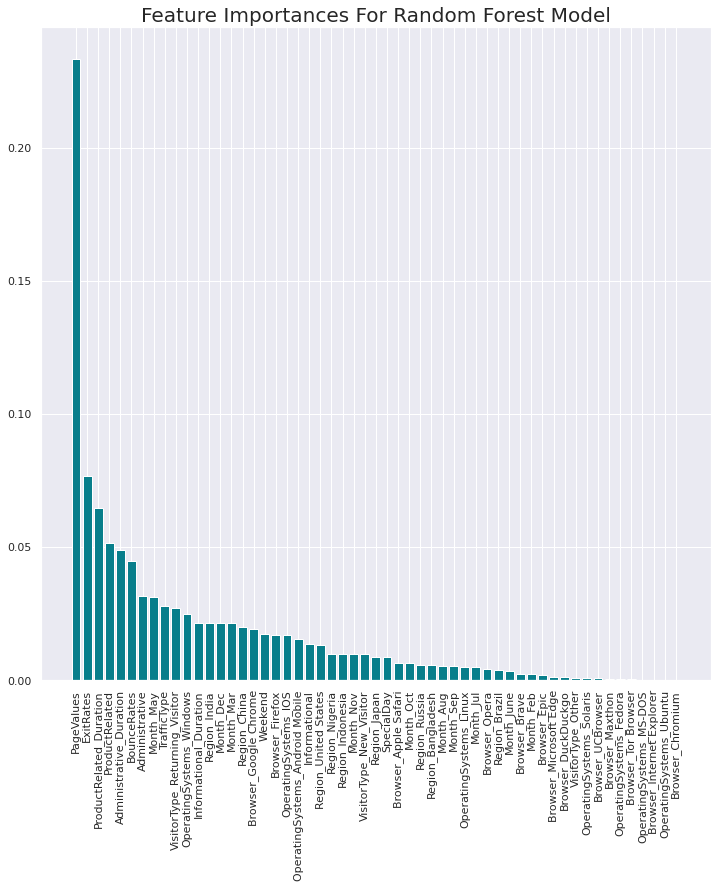

In [38]:
plt.figure(figsize=(12,12))
importances = pd.DataFrame(data={
    'Attribute': X_res.columns,
    'Importance': rf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importances For Random Forest Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

## 6. Gradient Boosting Decision Tree
### 6.1 Tuning Hyper-parameters

In [ ]:

from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


params = {
        'min_child_weight': [1, 5, 10],
        # 'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        # 'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 8, 12],
        'n_estimators': [500, 1000, 1500, 2000],
        'learning_rate': [0.02, 0.1, 0.2]
        }
xgb = XGBClassifier()

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 0)

search = GridSearchCV(xgb, param_grid=params, scoring='roc_auc', 
                      cv=skf.split(X_train_res, y_train_res), verbose=3, refit=True)

start_time = timer(None)
search.fit(X_train_res, y_train_res)
timer(start_time)
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)

### 6. XGBClassification with Tuned Hyperparameters + K-Fold CV

In [18]:
accuracy_xgb_kfold = []
precision_xgb_kfold = []
f1score_xgb_kfold = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for train_x, test_x in kfold.split(X_res, y_res):
  train_X, test_X = X_res.iloc[train_x,:], X_res.iloc[test_x,:]
  train_y, test_y = y_res[train_x], y_res[test_x]
  print(f"Training target statistics: {Counter(train_y)}")
  print(f"Testing target statistics: {Counter(test_y)}\n")
  
  xgb = XGBClassifier(n_estimators=500, random_state=0, max_depth=3, learning_rate=0.02, min_child_weight=1, subsample=0.8)
  xgb.fit(train_X, train_y)
  y_pred = xgb.predict(test_X)
  accuracy_xgb_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_xgb_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_xgb_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_xgb_kfoldmean = np.mean(accuracy_xgb_kfold) * 100
print("Accuracy for XGBClassifier with K-fold CV: %.3f" % (accuracy_xgb_kfoldmean))
precision_xgb_kfoldmean = np.mean(precision_xgb_kfold) * 100
print("Precision for XGBClassifier with K-fold CV: %.3f" % (precision_xgb_kfoldmean))
f1score_xgb_kfoldmean = np.mean(f1score_xgb_kfold) * 100
print("F1-score for XGBClassifier with K-fold CV: %.3f" % (f1score_xgb_kfoldmean))

Training target statistics: Counter({True: 8338, False: 8337})
Testing target statistics: Counter({False: 2085, True: 2084})

Training target statistics: Counter({True: 8338, False: 8337})
Testing target statistics: Counter({False: 2085, True: 2084})

Training target statistics: Counter({False: 8338, True: 8337})
Testing target statistics: Counter({True: 2085, False: 2084})

Training target statistics: Counter({False: 8338, True: 8337})
Testing target statistics: Counter({True: 2085, False: 2084})

Training target statistics: Counter({False: 8338, True: 8338})
Testing target statistics: Counter({False: 2084, True: 2084})

Accuracy for XGBClassifier with K-fold CV: 92.564
Precision for XGBClassifier with K-fold CV: 92.249
F1-score for XGBClassifier with K-fold CV: 92.590


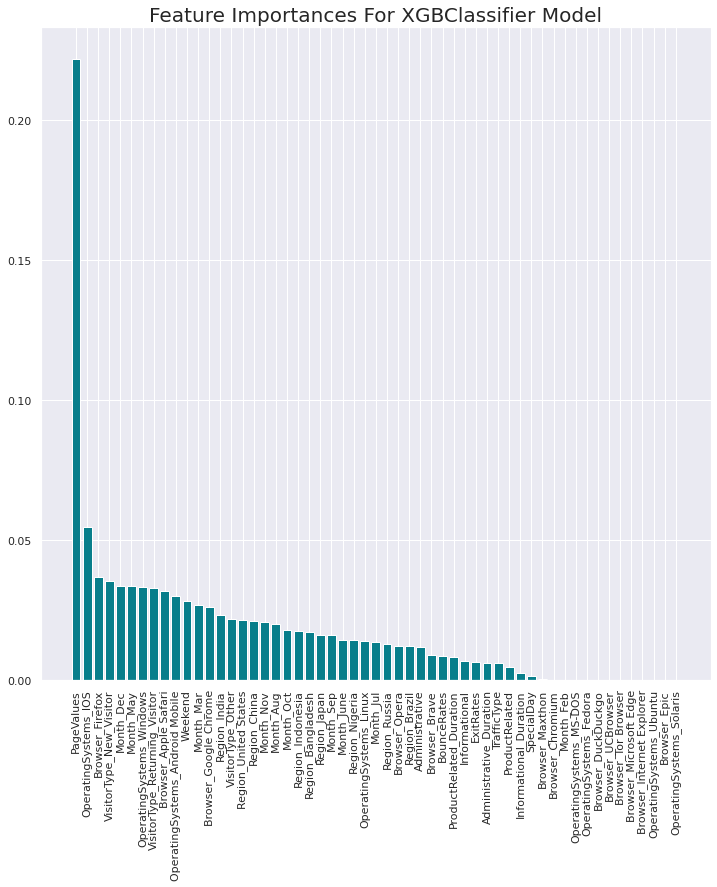

In [19]:
plt.figure(figsize=(12,12))
importances = pd.DataFrame(data={
    'Attribute': X_res.columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importances For XGBClassifier Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Model Comparison

In [ ]:
data = {'Algorithms':['Logistic Regression + k-fold', 'K-NN + k-fold', 'Decision Tree', 'Random Forest + k-fold', 'XGBClassifier + k-fold'], 
        'Accuracy':[accuracy_lg_kfoldmean, accuracy_knn_kfoldmean, accuracy_dtc, accuracy_rf_kfold, accuracy_xgb_kfoldmean],
        'Precision':[precision_lg_kfoldmean, precision_knn_kfoldmean, precision_dtc, precision_rf_kfold, precision_xgb_kfoldmean],
        'F1 Score':[f1score_lg_kfoldmean, f1score_knn_kfoldmean, f1score_dtc, f1score_rf_kfold, f1score_xgb_kfoldmean]}
 
# Calling DataFrame constructor
models = pd.DataFrame(data)
 
models

,Algorithms,Accuracy,Precision,F1 Score
0,Logistic Regression + k-fold,90.659153,94.197492,90.267291
1,K-NN + k-fold,89.910771,85.765351,90.464590
2,Decision Tree,91.484769,91.413662,91.565693
3,Random Forest + k-fold,93.979372,94.216061,94.013833
4,XGBClassifier + k-fold,91.805771,91.711264,91.813689


In [ ]:
data = {'Algorithms':['Logistic Regression + k-fold', 'K-NN + k-fold', 'SVC + k-fold', 'Decision Tree', 'Random Forest + k-fold', 'XGBClassifier + k-fold'], 
        'Accuracy':[accuracy_lg_kfoldmean, accuracy_knn_kfoldmean, accuracy_svc_kfoldmean, accuracy_dtc, accuracy_rf_kfold, accuracy_xgb_kfoldmean],
        'Precision':[precision_lg_kfoldmean, precision_knn_kfoldmean, precision_svc_kfoldmean, precision_dtc, precision_rf_kfold, precision_xgb_kfoldmean],
        'F1 Score':[f1score_lg_kfoldmean, f1score_knn_kfoldmean, f1score_svc_kfoldmean, f1score_dtc, f1score_rf_kfold, f1score_xgb_kfoldmean]}
 
# Calling DataFrame constructor
models = pd.DataFrame(data)
 
models